In [63]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np

In [2]:
recession=pd.read_csv('../data/USRECD.csv')
SP500=pd.read_csv('../data/S&P500.csv')
SP500_wk=pd.read_csv('../data/S&P500_1wk.csv')

In [3]:
display(SP500.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


In [4]:
display(recession.head())

,DATE,USRECD
0,1990-01-01,0
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


In [ ]:
data = SP500.loc[:, ['Date', 'Adj Close']]
# data = SP500_wk.loc[:, ['Date', 'Adj Close']]
period=1
regime_num=4
order=7
data['Adj Close'] = data['Adj Close'].astype(float)
data = data.set_index('Date')
data.head(5)
type(data)
data = data.pct_change().dropna()
data.head(5)
display(data.shape)
cutoff = 2000
marvok_regression = sm.tsa.MarkovAutoregression(data[:cutoff], k_regimes=regime_num, order=order, switching_ar=False,switching_variance=True)
res = marvok_regression.fit()
display(res.summary())


(8063, 1)

C:\Users\AIR-USER14\anaconda3\envs\markov_regime_switching\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1993, 2)

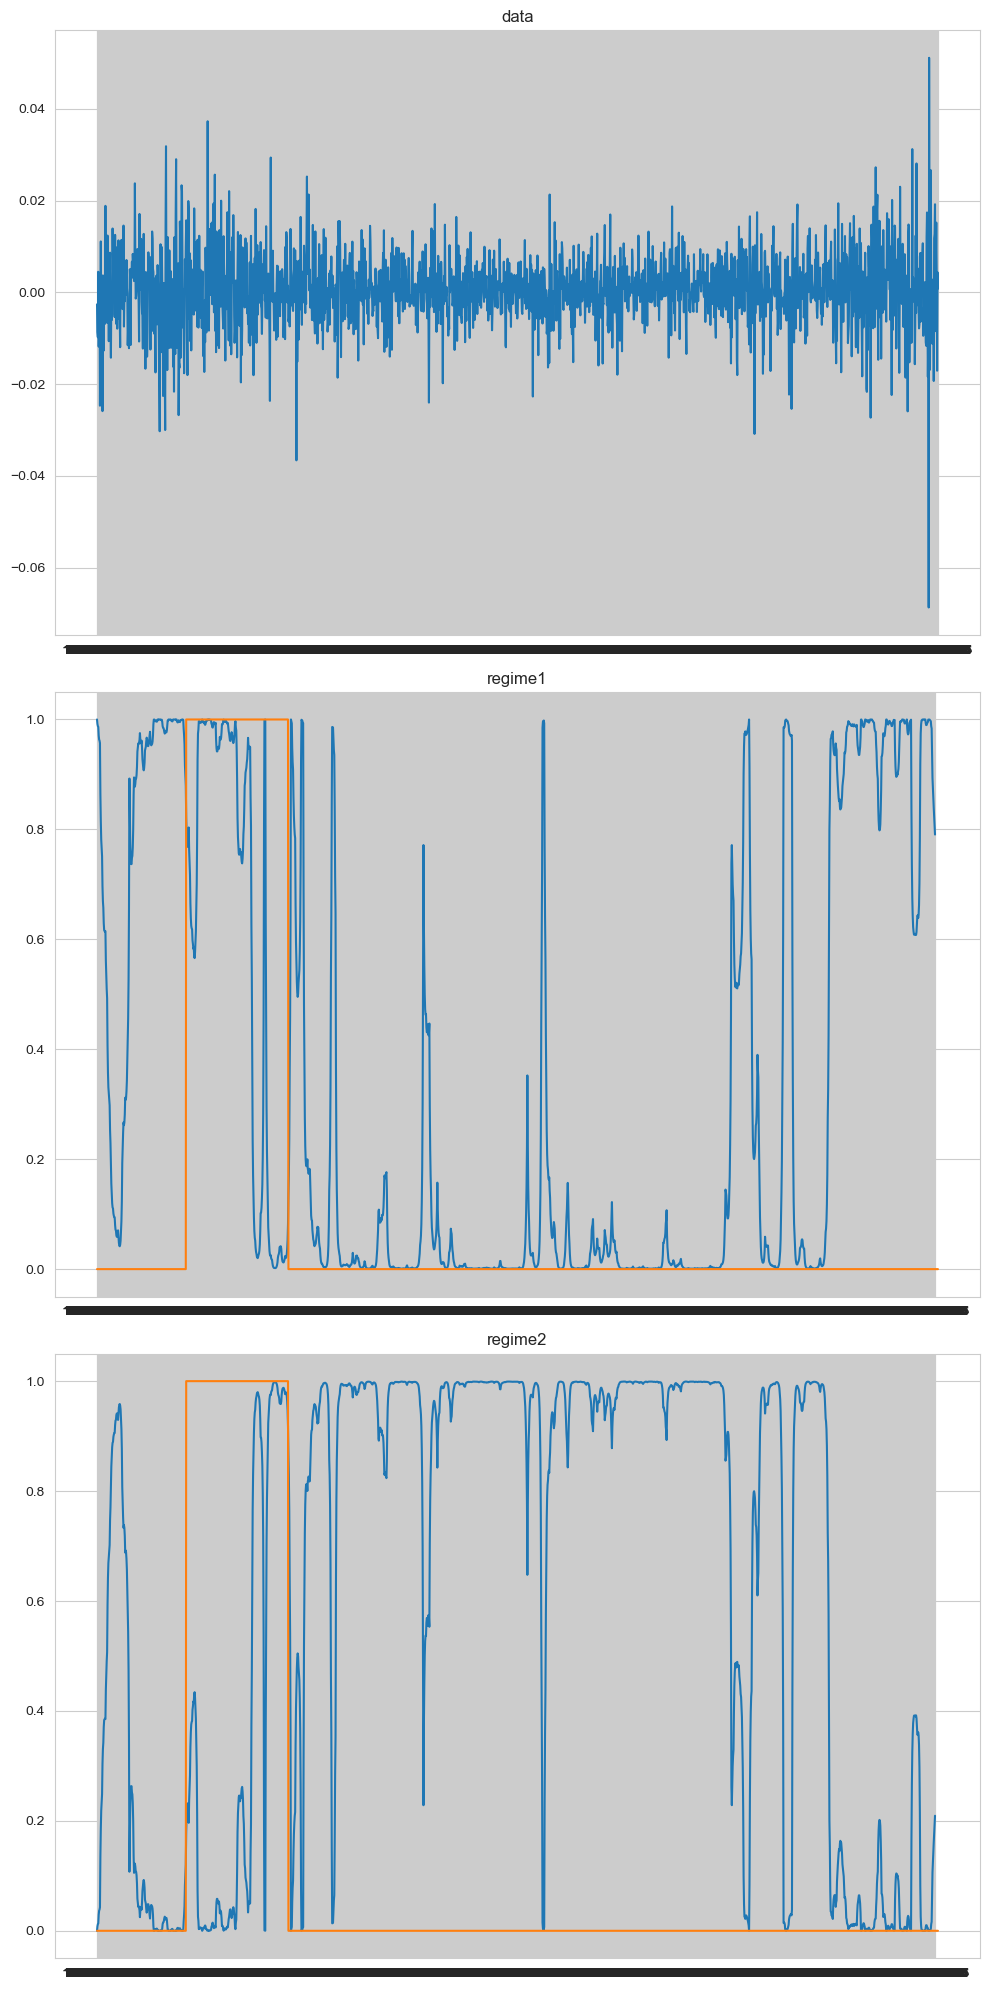

In [49]:
## Plotting

fig, ax = plt.subplots(regime_num+1, 1, figsize=(10, 20))
ax[0].plot(data[:cutoff])
ax[0].set_title('data')
display(res.smoothed_marginal_probabilities.shape)
for i in range(regime_num):
    ax[i+1].plot(res.smoothed_marginal_probabilities.loc[:,i])
    ax[i+1].plot(recession['USRECD'][:cutoff:period])
    ax[i+1].set_title('regime'+str(i))

# ax[3].plot(res.smoothed_marginal_probabilities[2])
# ax[3].set_title('regime3')
# sum = res.smoothed_marginal_probabilities[0] + res.smoothed_marginal_probabilities[1]
plt.tight_layout()


In [50]:
# try voting

In [51]:
type( res.smoothed_marginal_probabilities)

pandas.core.frame.DataFrame

In [52]:
display(res.smoothed_marginal_probabilities[0].shape)

(1993,)

In [53]:
display(res.smoothed_marginal_probabilities.shape)

(1993, 2)

In [54]:
agg_prob=pd.DataFrame(np.zeros((res.smoothed_marginal_probabilities.shape[0], res.smoothed_marginal_probabilities.shape[1])))

In [55]:
display(agg_prob.shape)

(1993, 2)

In [56]:
smooth_len=5
for i in range(len(res.smoothed_marginal_probabilities.loc[:,0])//smooth_len):
    avg_0=res.smoothed_marginal_probabilities.loc[:,0][i:i+smooth_len].mean()
    avg_1=res.smoothed_marginal_probabilities.loc[:,1][i:i+smooth_len].mean()
    print(avg_0,avg_1)
    if avg_1<=avg_0:
        for j in range(smooth_len):
            agg_prob.loc[i*smooth_len+j,0] = avg_0
            agg_prob.loc[i*smooth_len+j,1] = avg_1
    else:
        for j in range(smooth_len):
            agg_prob.loc[i*smooth_len+j,0] = avg_0
            agg_prob.loc[i*smooth_len+j,1] = avg_1

0.9873354308756523 0.012664569124351118
0.9800348710516925 0.01996512894831116
0.9739855149330225 0.026014485066981174
0.9678395461654301 0.03216045383457356
0.9435214128590236 0.056478587140980176
0.9123681617597048 0.08763183824029903
0.8759333952914335 0.12406660470857019
0.8367521610707704 0.16324783892923328
0.795578499001819 0.20442150099818482
0.7619456612728602 0.2380543387271435
0.7328460274207526 0.26715397257925116
0.7080862105780846 0.29191378942191903
0.6808485605358003 0.3191514394642032
0.6539288793295133 0.34607112067049034
0.637592265670998 0.36240773432900547
0.6264960647220476 0.3735039352779559
0.6179477718309137 0.3820522281690898
0.6043322892397638 0.39566771076023965
0.5879796610911843 0.4120203389088192
0.5669430124330312 0.4330569875669723
0.5427429559335528 0.45725704406645085
0.5011727547000545 0.49882724529994904
0.46052219798379807 0.5394778020162055
0.41974791915827386 0.5802520808417296
0.3817856031792434 0.6182143968207601
0.344612053881704 0.65538794611

(1993, 2)

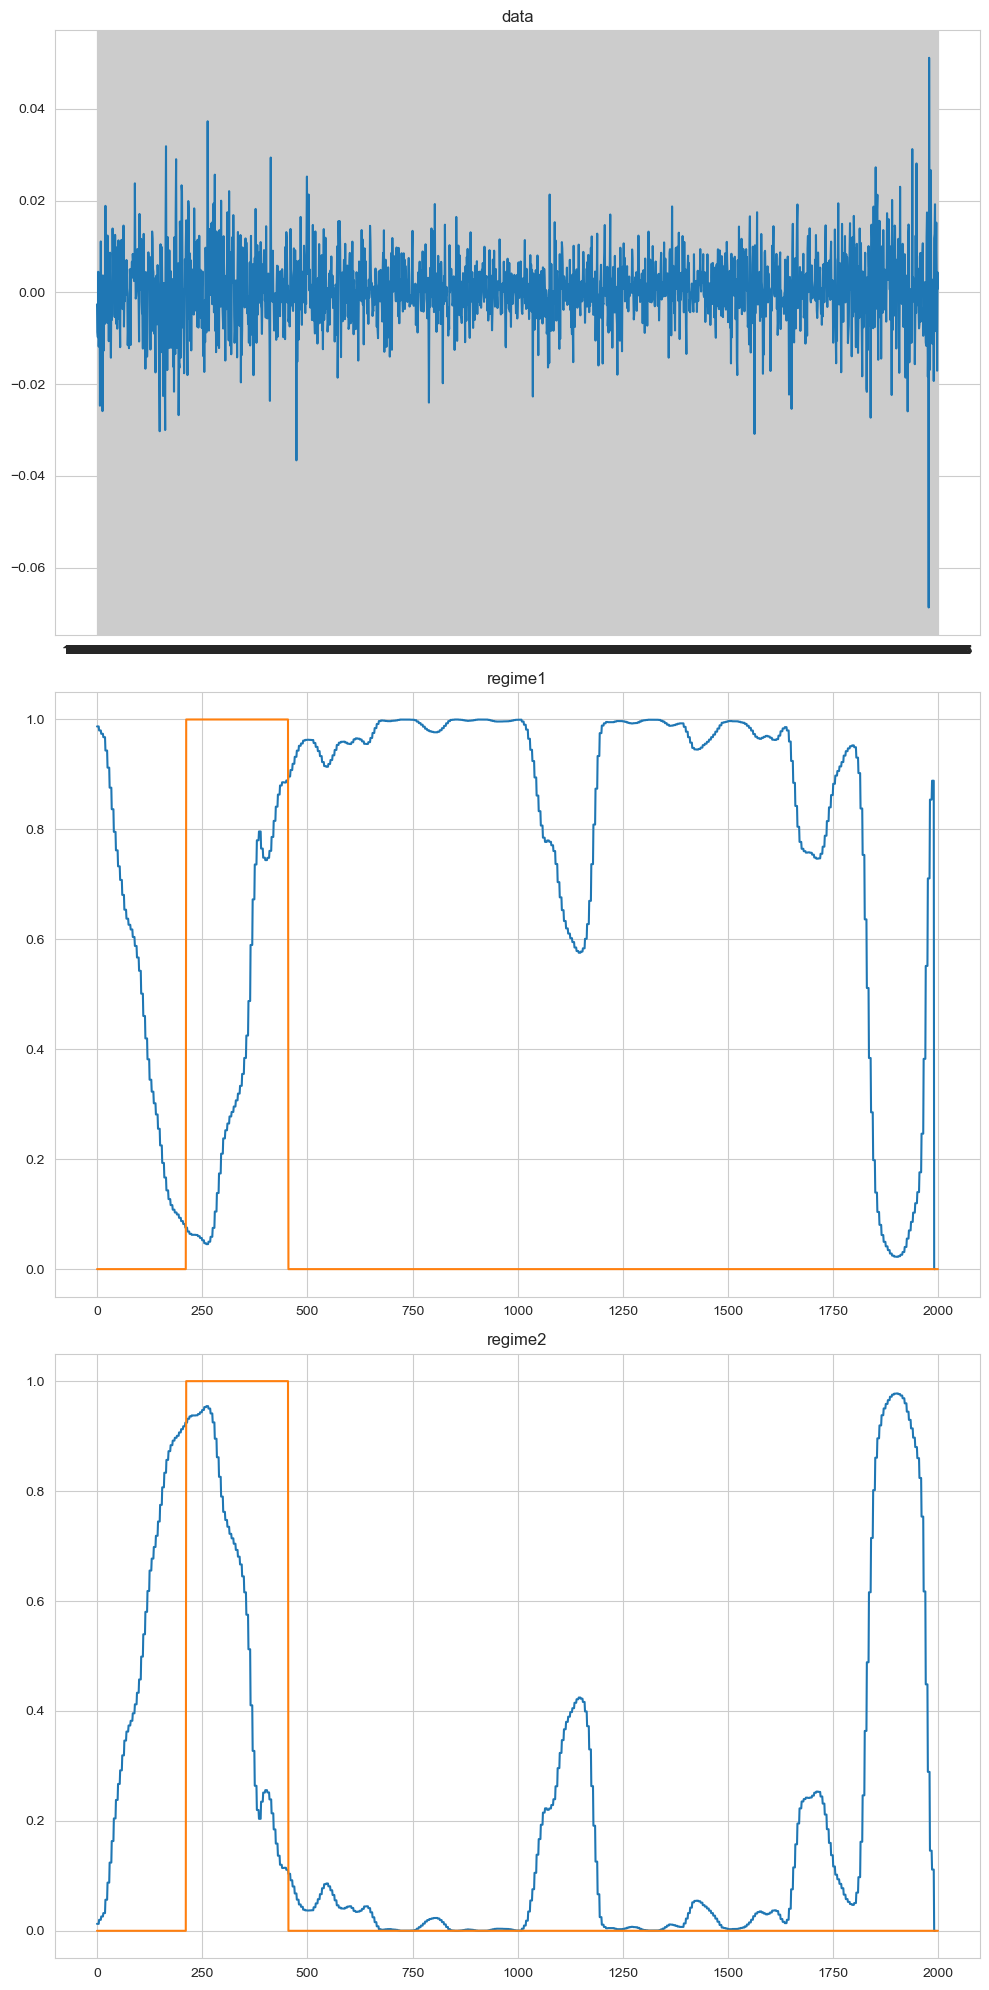

In [57]:

## Plotting

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
ax[0].plot(data[:cutoff])
ax[0].set_title('data')
display(agg_prob.shape)
ax[1].plot(agg_prob[0])
ax[1].plot(recession['USRECD'][:cutoff:period])
ax[1].set_title('regime1')

ax[2].plot(agg_prob[1])
ax[2].plot(recession['USRECD'][:cutoff:period])
ax[2].set_title('regime2')

# ax[3].plot(res.smoothed_marginal_probabilities[2])
# ax[3].set_title('regime3')
# sum = res.smoothed_marginal_probabilities[0] + res.smoothed_marginal_probabilities[1]
plt.tight_layout()

In [62]:
recession.head()

,DATE,USRECD
0,1990-01-01,0
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


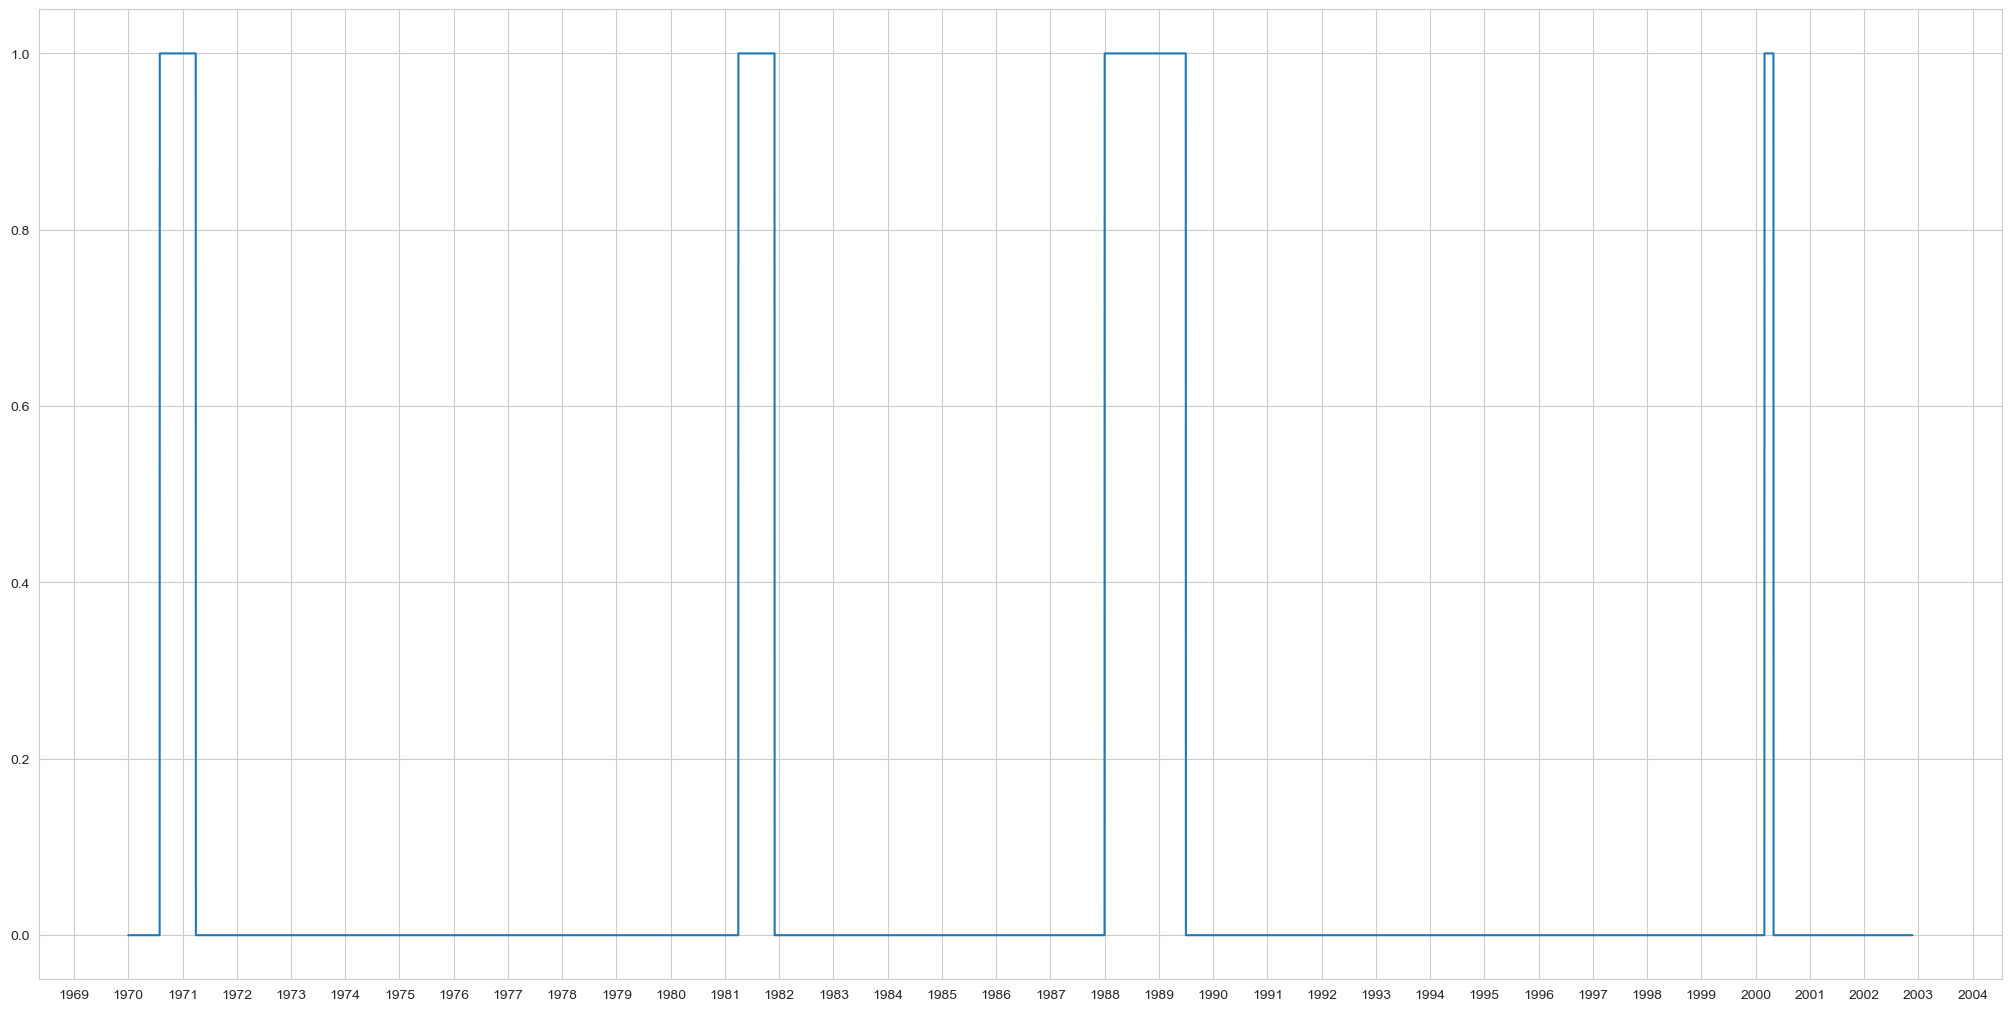

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(20,10), constrained_layout=True)
# common to all three:
ax.plot('DATE', 'USRECD', data=recession)
# Major ticks every half year, minor ticks every month,
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.grid(True)
